In [29]:
import numpy as np # type: ignore

In [9]:
# Bai tap 1 (A)
arr = np.arange(0, 10, 1)
print(arr)

[0 1 2 3 4 5 6 7 8 9]


In [10]:
# Bai tap 2 (D)
# arr = np.ones((3, 3), dtype=bool)
# arr = np.ones((3, 3)) > 0
arr = np.full((3, 3), fill_value=True, dtype=bool)
print(arr)

[[ True  True  True]
 [ True  True  True]
 [ True  True  True]]


In [11]:
# Bai tap 3 (A)
arr = np.arange(0, 10, 1)
print(arr[arr % 2 == 1])

[1 3 5 7 9]


In [12]:
# Bai tap 4 (B)
arr = np.arange(0, 10, 1)
arr[arr%2==1] = -1
print(arr)

[ 0 -1  2 -1  4 -1  6 -1  8 -1]


In [13]:
# Bai tap 5 (B)
arr = np.arange(10)
arr_2d = arr.reshape(2, -1)
print(arr_2d)

[[0 1 2 3 4]
 [5 6 7 8 9]]


In [14]:
# Bai tap 6 (A)
arr1 = np.arange(10).reshape(2, -1)
arr2 = np.repeat(1, 10).reshape(2, -1)
c = np.concatenate([arr1, arr2], axis=0)
print(c)

[[0 1 2 3 4]
 [5 6 7 8 9]
 [1 1 1 1 1]
 [1 1 1 1 1]]


In [15]:
# Bai tap 7 (C)
arr1 = np.arange(10).reshape(2, -1)
arr2 = np.repeat(1, 10).reshape(2, -1)
c = np.concatenate([arr1, arr2], axis=1)
print(c)

[[0 1 2 3 4 1 1 1 1 1]
 [5 6 7 8 9 1 1 1 1 1]]


In [16]:
# Bai tap 8 ( A )
arr = np.array([1, 2, 3])
print(np.repeat(arr, 3))
print(np.tile(arr, 3))

[1 1 1 2 2 2 3 3 3]
[1 2 3 1 2 3 1 2 3]


In [17]:
# Bai tap 9 ( C )
a = np.array([2, 6, 1, 9, 10, 3, 27])
index = np.where((a >= 5) & (a <= 10))
print("result", a[index])

result [ 6  9 10]


In [18]:
# Bai tap 10 ( D )
def maxx(x, y):
    if x >= y:
        return x
    else:
        return y


a = np.array([5, 7, 9, 8, 6, 4, 5])
b = np.array([6, 3, 4, 8, 9, 7, 1])

pair_max = np.vectorize(maxx, otypes=[float])

print(pair_max(a, b))

[6. 7. 9. 8. 9. 7. 5.]


In [30]:
# Bai tap 11 ( A )
a = np.array([5, 7, 9, 8, 6, 4, 5])
b = np.array([6, 3, 4, 8, 9, 7, 1])

print("Result : ", np.where(a < b, b, a))

Result :  [6 7 9 8 9 7 5]


In [23]:
!gdown 1i9dqan21DjQoG5Q_VEvm0LrVwAlXD0vB
!mkdir 'images/'
!mv 'dog.jpeg' './images/dog.jpeg'

Downloading...
From: https://drive.google.com/uc?id=1i9dqan21DjQoG5Q_VEvm0LrVwAlXD0vB
To: /Users/eddy/Projects/AI/AIO/dog.jpeg
100%|███████████████████████████████████████| 33.7k/33.7k [00:00<00:00, 897kB/s]
mkdir: images/: File exists


In [26]:
# Bài tập xử lý ảnh

import cv2 # type: ignore
import matplotlib.pyplot as plt # type: ignore


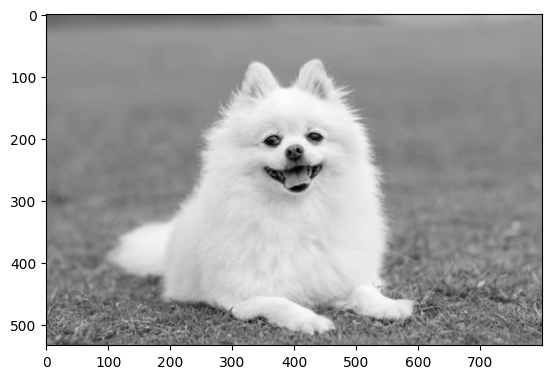

In [25]:
# Bước 1 : Đọc ảnh từ file
origin_image = cv2.imread('images/dog.jpeg')

# Bước 2 : Chuyển ảnh qua chế độ màu xám
image_gray = cv2.cvtColor(origin_image, cv2.COLOR_BGR2GRAY)

# Bước 2 : Save ảnh
GRAY_IMAGE_PATH = 'images/dog_gray.jpeg'
cv2.imwrite(GRAY_IMAGE_PATH, image_gray)
# Hiển thị ảnh
plt.imshow(image_gray, cmap='gray')
plt.show()

126.22999999999999


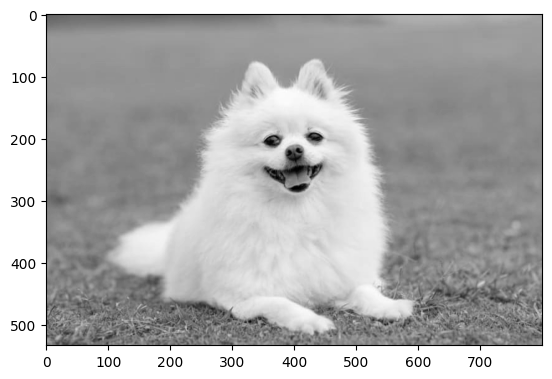

In [61]:
# Bài 2 Xử lý ảnh

# 1 Phương pháp Lightness | Câu 12 : A, Câu 13 : A, Câu 14 : C
def convert_to_grayscale_lightness(image):
    # Tách các kênh màu của ảnh
    B, G, R = cv2.split(image)

    # Tính giá trị lớn nhất và nhỏ nhất của mỗi pixel
    max_value = np.maximum(np.maximum(R, G), B)
    min_value = np.minimum(np.minimum(R, G), B)

    # Tính trung bình của giá trị lớn nhất và nhỏ nhất
    lightness = (max_value + min_value) / 2
    # print(lightness[0, 0])

    # Chuyển đổi sang kiểu dữ liệu uint8 (8-bit unsigned integer)
    grayscale_image = lightness.astype(np.uint8)

    return grayscale_image


def convert_to_grayscale_average(image):
    # Tính giá trị trung bình của các kênh màu (R, G, B)
    lightness = np.mean(image, axis=2)
    # print(lightness[0, 0])

    # Chuyển đổi sang kiểu dữ liệu uint8 (8-bit unsigned integer)
    grayscale_image = lightness.astype(np.uint8)

    return grayscale_image


def convert_to_grayscale_luminosity(image):
    # Tách các kênh màu của ảnh
    B, G, R = cv2.split(image)

    # Nhân hệ số tương ứng của 3 kênh màu như sau: 0.21*R + 0.72*G + 0.07*B
    lightness = 0.21*R + 0.72*G + 0.07*B
    # print(lightness[0, 0])

     # Chuyển đổi sang kiểu dữ liệu uint8 (8-bit unsigned integer)
    grayscale_image = lightness.astype(np.uint8)

    return grayscale_image


origin_image = cv2.imread('images/dog.jpeg')

gray_image = convert_to_grayscale_luminosity(origin_image)

plt.imshow(gray_image, cmap='gray')
plt.show()

In [63]:
#Phân tích dữ liệu dạng bảng
!gdown 1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq
!mkdir documents/
!mv 'advertising.csv' 'documents/advertising.csv'    

Downloading...
From: https://drive.google.com/uc?id=1iA0WmVfW88HyJvTBSQDI5vesf-pgKabq
To: /Users/eddy/Projects/AI/AIO/advertising.csv
100%|██████████████████████████████████████| 4.06k/4.06k [00:00<00:00, 3.28MB/s]


In [96]:
import pandas as pd  # type: ignore

df = pd.read_csv('./documents/advertising.csv')

data = df.to_numpy()

# Cột TV,Radio,Newspaper,Sales => 0, 1, 2, 3

# Câu 15 C
max_sales_value = df['Sales'].max()
max_sales_index = df['Sales'].idxmax()
print(max_sales_value, max_sales_index)

# Câu 16 B
average_tv = df['TV'].mean()
print(average_tv)

# Câu 17 A
sales_gte_20 = df['Sales'].values
count_gte_20_sales = np.sum(sales_gte_20 >= 20)
print(count_gte_20_sales)

# Câu 18 B
array_filtered_sales_gte_15 = df[df['Sales'] >= 15]
mean_radio = array_filtered_sales_gte_15['Radio'].mean()
print(mean_radio)

# Câu 19 C
average_newspapers = df['Newspaper'].mean()
array_filtered_newspaper_gte_mean = df[df['Newspaper'] >= average_newspapers]
sum_row_sales = array_filtered_newspaper_gte_mean['Sales'].sum()
print(sum_row_sales)

# Câu 20 C
average_sales = df['Sales'].mean()
scores = np.where(df['Sales'] > average_sales, 'Good',
                  np.where(df['Sales'] < average_sales, 'Bad', 'Average')
                  )
print(scores[7:10])

# Câu 21 C
# Tìm giá trị trên cột 'Sales' gần nhất với giá trị trung bình của chính cột 'Sales'
closest_to_mean_sales_value = df['Sales'].iloc[(df['Sales'] - average_sales).abs().argmin()]

# Tạo mảng 'scores' với các giá trị 'Good', 'Average', 'Bad' dựa trên điều kiện so sánh với giá trị gần nhất A
scores = np.where(df['Sales'] > closest_to_mean_sales_value, 'Good',
                  np.where(df['Sales'] < closest_to_mean_sales_value, 'Bad', 'Average'))

# In ra kết quả scores[7:10]
scores_subset = scores[7:10]
print(scores_subset)



27.0 175
147.0425
40
26.22293577981651
1405.1
['Bad' 'Bad' 'Good']
